## Naively exploring how DTMF works using Python

In [1]:
import os
import wave 
import pylab 
import numpy 

In [2]:
from numpy import * 
from pylab import *

In [3]:
from matplotlib import pyplot
%matplotlib inline

In [5]:
dtmf_dir = os.path.join(os.getcwd(), "dialabc")
print(dtmf_dir)

/notebooks/DTMF/dialabc


In [17]:
wav = wave.open(os.path.join(dtmf_dir, "0_16KHz_300ms.wav"), 'r')
frames = wav.readframes(-1)
sound_info = pylab.frombuffer(frames, dtype=numpy.dtype("int16"))
frame_rate = wav.getframerate()
wav.close()
channels = len(sound_info.shape)
print(sound_info.shape)
print(frame_rate)

(5600,)
16000


In [18]:
print(sound_info[0:50])
print(channels)
print(type(sound_info))
print(sound_info.dtype)

[     0    441   1184   1941   2380   2239   1419     42  -1581  -3029
  -3905  -3955  -3158  -1735    -85   1333   2156   2228   1660    797
     97    -23    635   1966   3539   4712   4820   3403    402  -3747
  -8153 -11666 -13159 -11862  -7616  -1004   6721  13884  18777  20088
  17255  10658   1571  -8102 -16265 -21139 -21680 -17852 -10618  -1695]
1
<class 'numpy.ndarray'>
int16


In [21]:
n = sound_info.shape[0] 
k = arange(n)
T = n / (frame_rate * 1.0) 

frq = k / T 
frq = frq[range(n//2)]

print(n, k, T, frq)

5600 [   0    1    2 ... 5597 5598 5599] 0.35 [0.00000000e+00 2.85714286e+00 5.71428571e+00 ... 7.99142857e+03
 7.99428571e+03 7.99714286e+03]


Text(0, 0.5, 'Power (dB)')

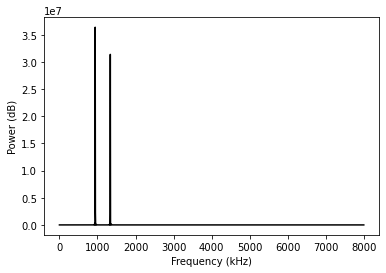

In [23]:
y = numpy.fft.fft(sound_info) / n 
y = y[range(n//2)]
y = (abs(y)) ** 2

plt.plot(frq, abs(y), color='k')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')

In [ ]:
Above we see two sharp peaks at around 940 and 1336
(look at the _DTMF keypad frequencies_ table at https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling)

In [24]:
import pandas

In [25]:
df = pandas.DataFrame(data={ 'Frequency':frq, 'PowerDB': y })
df.columns
df

,Frequency,PowerDB
0,0.000000,0.010690
1,2.857143,0.015067
2,5.714286,0.027437
3,8.571429,0.038860
4,11.428571,0.059813
...,...,...
2795,7985.714286,0.000256
2796,7988.571429,0.000249
2797,7991.428571,0.000313
2798,7994.285714,0.000051


In [27]:
dframe_size = df.Frequency.size
print(dframe_size)
power_sorted = sorted(y)
print(power_sorted[-1], power_sorted[-2])

2800
36367736.912030995 31372916.380938414


In [31]:
df_sorted = df.sort_values('PowerDB')
print(df_sorted)

        Frequency       PowerDB
2235  6385.714286  4.726236e-07
1177  3362.857143  1.048751e-06
1605  4585.714286  1.109417e-06
2416  6902.857143  1.219144e-06
2431  6945.714286  1.978187e-06
...           ...           ...
331    945.714286  2.268530e+06
330    942.857143  1.500531e+07
467   1334.285714  1.992290e+07
468   1337.142857  3.137292e+07
329    940.000000  3.636774e+07

[2800 rows x 2 columns]


In [32]:
print(df_sorted.Frequency.iloc[dframe_size-1])
print(df_sorted.Frequency.iloc[dframe_size-2])

940.0000000000001
1337.1428571428573


|        | 1209Hz | 1336Hz | 1477Hz |
| ------ | ------ | ------ | ------ |
| 697Hz	 | 1	  | 2	   | 3      | 
| 770Hz	 | 4	  | 5	   | 6      | 
| 852Hz	 | 7	  | 8	   | 9      | 
| 941Hz	 | *      | 0	   | #      |